The  dataset consists of lists of data collected from Glassdoor job postings and consists of the followng twelve column headings:
(1) JobType; (2) JobLocationByState; (3) HeadquartersState; (4) SizeCoLowEndEstimate;                  (5) SizeCoHighEndEstimate; (6) Rating; (7) AgeOfCompany; (8) RevenuesLowEndEstimate;               (9) RevenuesHighEndEstimate; (10) SalaryLowEndEstimate, (11)SalaryHighEndEstimate; and, (12) Rating.

The information in the rows under each column was obtained from Glassdoor.com and presented in typical Glassdoor format.

The data in each column is explained in greater detail in the next paragraph : 
 

INSIGHTS section :

OVERVIEW of the Insights sought in this analysis:

The dataframe this Python program analyzes resuts from a dataset of companies' Glassdoor postings of job openings accompanied by various attributes of interest for each job opening posted :

We are especially interested in how salary and job category correlate to the other attributes, in the hope of discovering actual insights into criteria for finding the highest paid positions by searching for companies with workforce size, revenues, years since founding, openings by job categpory, etc., associated with the highest salaries.

As a secondary consideration, we are also interested in how Glassdoor ratings correlate to these attributes with the gola of finding companies with the highest ratings based on these search criteria for companies' size, age, revenues, etc., as long as this does not conflict with finding job positions with the highest salaries.

The attributes of interest which Glassdoor listed with each job opening are: 

(1) Each company's Glassdoor estimated salary range for the specified job opening: These are to found in the colummns "SalaryLowEndEstimate" which is Glassdoor's low end estimate of the salary associated with the specific job listing and "SalaryHighEndEstimate" which  Glassdoor's high end estimate of the salary associated with that samejob listing
  
(2) Broad job category of data analytics /data science professional associated with the job description, comproised of 4 categories : Data Analyst ; Business Analyst; Data Scientist; and , Data Engineer: These are listed in the first column under the heading "JobType" number coded so that "JobType" 1 refers to Data Analyst job postings "JobType" 2 refers to Business Analyst job ppstings; JobType" 3 refers to Data Engineer job postimgs; and, "JobType" 4 refers to Data Scientist job postings. (The Job Titles included in this dataset's listed job postings did not necessarily match the corrsponding Job Type in each instance, but evidently the author of this dataset used specific job descriptions and job offer salary ranges to decide which job should be included in any of the 4 job categories "JObTypes"; and, based on the salary ranges listed for each job posting, the author of this dataset seems to have exercised good judgement.

(3) In the column headed "Rating" each company's Glassdoor rating, (between 5 and 1, from highest rating to lowest rating)

(4) Glassdoor's estimated ranges for each job posting company's revenues: These are to found in the colummns "RevenuesLowEndEstimate" which is Glassdoor's low end estimate of the revenues associated with the specific company which posted that job listing and "RevenuesHighEndEstimate" which  Glassdoor's high end estimate of the revenues associated with that same company which posted that job listing.  

(5) Estimated range for the company's number of employees : Glassdoor's estimated ranges for each job posting company's number of employees : THese are to be found in the columns "SizeCoLowEndEstimate", which is Glassdoor's low end estimate of the number of employees working for the the specific company which posted that job listing and "SizeHighEndEstimate" which  Glassdoor's high end estimate of the number of employeess associated with that same company which posted that job listing.  

(6) AgeOfCompanColunn:  Number of years since each comoany's founding : These are listed in the AgeOfCompany column. 

(7) Job Location by U.S. state plus Puerto Rico and Washington,  District of Columbia  : These are listed in the JobLocationByState column. 

(8) Location of company headquarters by U.S. state plus Puerto Rico and Washington,  District of Columbia : These are listed in the HeadquartersState column. 

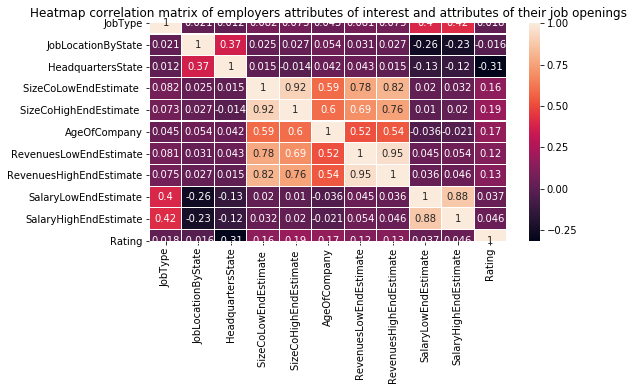

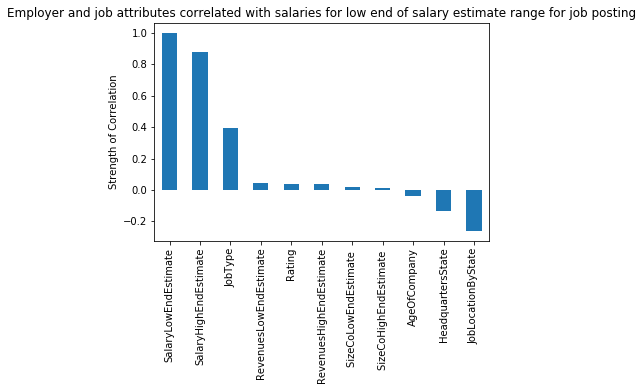

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as md 
from matplotlib.dates import DateFormatter
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
dfBigDataJobs = pd.read_csv("BigDataJobs.csv", header=0)
dfBigDataJobs.set_index("RowID",inplace=True)
#
# We are most interested in what distinguishes the best jobs for Data Scientists, Data Analysts, Business Analysts, and Data Engineers, i e, the jobs with
# the highest salaries and highest Glassdoor ratings, from less desirable jobs with lower ratings and lower salaries.
# To that end we are trying to find patterns and correlations, (if any), between the best jobs with high salaries and/or high Glassdoor ratings, with variables such
# as Job Location (by state), Employer Headquarters, (by state), Size of Employer, i e, estimates of number of company s employees, employer s estimated Revenues 
# and the number of years an employer has been in business.
#  Plotting a “Heatmap” Correlation Matrix
CoRelat = dfBigDataJobs.corr()
fig, ax = plt.subplots(figsize=(8,4)) 
sns.heatmap(CoRelat, annot=True,linewidths=.1,
            xticklabels=CoRelat.columns.values,
            yticklabels=CoRelat.columns.values,
            ax=ax)
plt.title("Heatmap correlation matrix of employers attributes of interest and attributes of their job openings")
plt.show()
CoRelatII = CoRelat.sort_values('SalaryLowEndEstimate', ascending=False)
CoRelatII['SalaryLowEndEstimate'].plot(kind='bar')
plt.title("Employer and job attributes correlated with salaries for low end of salary estimate range for job posting")
plt.ylabel("Strength of Correlation")
plt.show()  


Insight 1: SUMMARY: Bivariate Correlation which calculates Pearson's Correlation Co-efficients showed negligible correlation between estimated salaries and any of the other company/job attributes EXCEPT "Job Type" ; and, even that correlation was only .4. (In terms of Pearson's correlation co-efficents, a "strong correlation" is at least .5.) However, this merely means that we must apply other analytic methods which are not based on approximating a linear relationship to this anlaysis.
DETAILS: The charts presented above are :

(1) a Correlation Matrix which was generated by Python's .corr() function which uses Pearson's Correlation method ; and, directly below it,

(2) Barplot chart also generated by Python's .corr() function which presents the results listed in the Correlation matrix in an easier to comprehend, better readable format, especially for focusing on our primary attributes of interest, salaries, and Data Science professional job categories, and their correlations with each other and the other attributes.

The fact that the matrix shows little or no correlation between salary and any of the other variables EXCEPT “Job Type” merely shows that there are NO linear relationships between salary and the other attributes besides "Job Type", NO relationships where salary consistently always increases or decreases in conjunction with together with the other, NOT that there are no correlations

Additioanlly, a correlation matrix would not identify a correlation between inherently non-numeric data such as geographicla location of a job opportunity and its associated salary.

KEY INSIGHT : Pearson Correlation Coefficient computation provided us valuable service as a process of elimination, allowing us to skip other methods based on linear assumptions, in favor of other types of analytic methods suitable in these circumstances :
Correlation Matrix is often a preliminary step for selecting whivh variables to include in applying other methods based on linear approximation such as linear regression; in this case, the results quickly indicated that using those methods would be a wast if time. This Pearson Correlation Coefficiant computation served the valauble purpose of quickly moving on to apply other types of analytic methods suitable in these circumstances,

up to here went okay


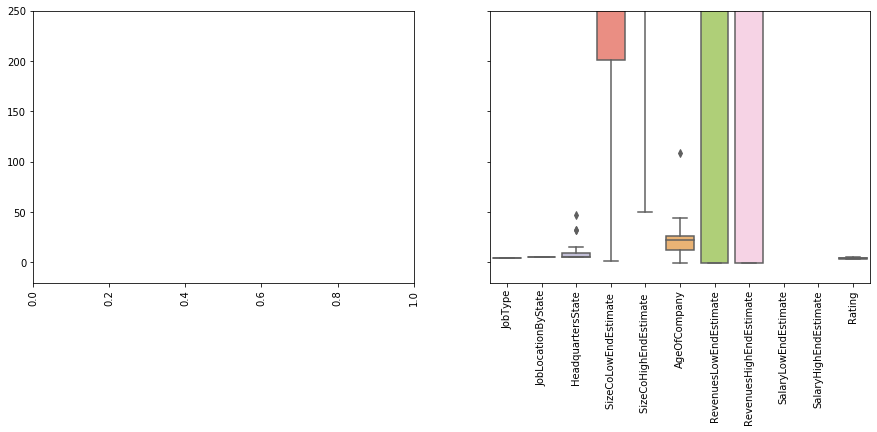

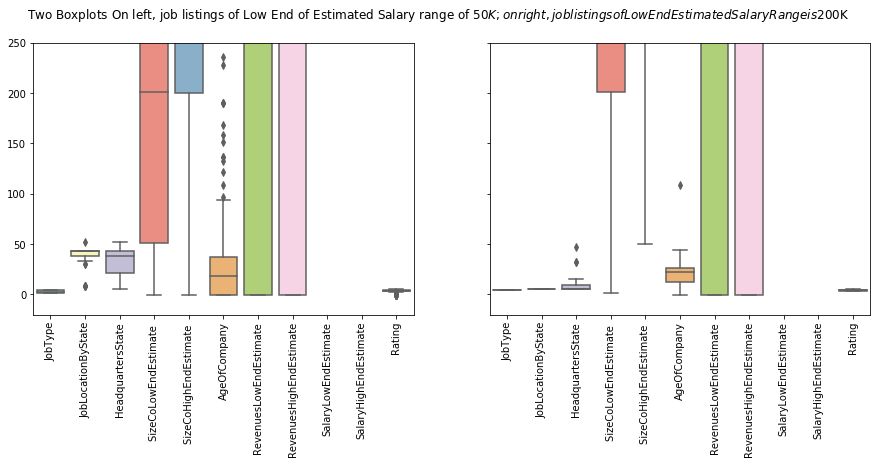

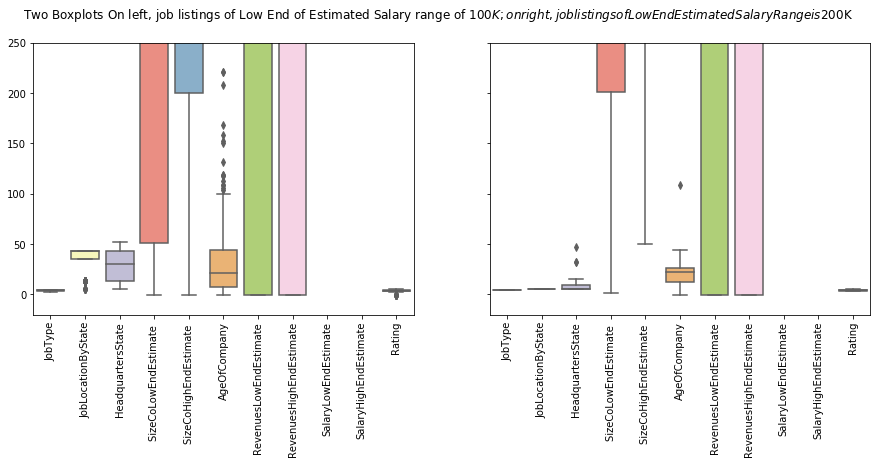

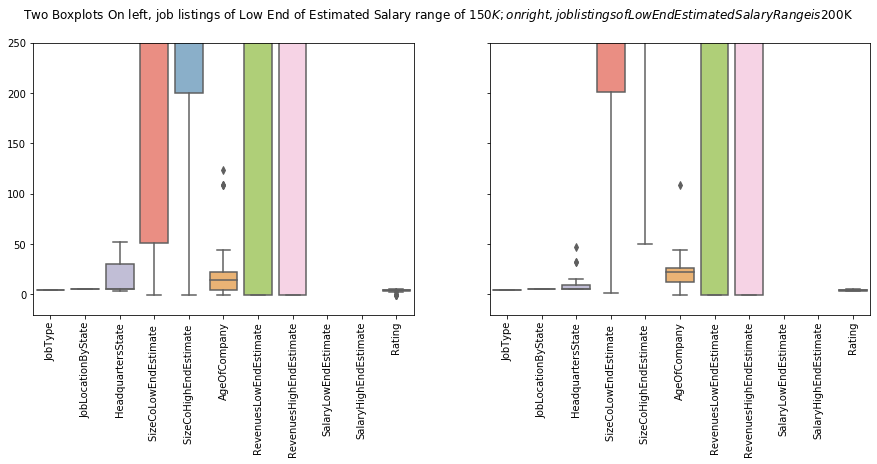

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as md 
from matplotlib.dates import DateFormatter
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
dfBigDataJobs = pd.read_csv("BigDataJobs.csv", header=0)
dfBigDataJobs.set_index("RowID",inplace=True)
mpl.rcParams['figure.figsize'] = (15,5)
f, axes = plt.subplots(1, 2, sharey=True)
dfBigDataJobsSalary = dfBigDataJobs[dfBigDataJobs['SalaryLowEndEstimate']==200000]
sns.boxplot(data= dfBigDataJobsSalary, orient='v', palette='Set3', ax=axes[1])
for ax in f.axes:
    mpl.pyplot.sca(ax) 
    plt.ylim(-20,250)
    plt.xticks(rotation=90)
dfBigDataJobsSalary = dfBigDataJobs[dfBigDataJobs['SalaryLowEndEstimate']==50000]
mpl.rcParams['figure.figsize'] = (15,5)
f,axes = plt.subplots(1, 2, sharey=True )        
f.suptitle("Two Boxplots On left, job listings of Low End of Estimated Salary range of $50K; on right, job listings of Low End Estimated Salary Range is $200K")
sns.boxplot(data=dfBigDataJobsSalary, orient='v', palette='Set3', ax=axes[0])
dfBigDataJobsSalary = dfBigDataJobs[dfBigDataJobs['SalaryLowEndEstimate']==200000]
sns.boxplot(data= dfBigDataJobsSalary, orient='v', palette='Set3', ax=axes[1])
for ax in f.axes:
    mpl.pyplot.sca(ax) 
    plt.ylim(-20,250)
    plt.xticks(rotation=90)
dfBigDataJobsSalary = dfBigDataJobs[dfBigDataJobs['SalaryLowEndEstimate']==100000]
mpl.rcParams['figure.figsize'] = (15,5)
f,axes = plt.subplots(1, 2, sharey=True )        
f.suptitle("Two Boxplots On left, job listings of Low End of Estimated Salary range of $100K; on right, job listings of Low End Estimated Salary Range is $200K")
sns.boxplot(data=dfBigDataJobsSalary, orient='v', palette='Set3', ax=axes[0])
dfBigDataJobsSalary = dfBigDataJobs[dfBigDataJobs['SalaryLowEndEstimate']==200000]
sns.boxplot(data= dfBigDataJobsSalary, orient='v', palette='Set3', ax=axes[1])
for ax in f.axes:
    mpl.pyplot.sca(ax) 
    plt.ylim(-20,250)
    plt.xticks(rotation=90)   
dfBigDataJobsSalary = dfBigDataJobs[dfBigDataJobs['SalaryLowEndEstimate']==150000]
mpl.rcParams['figure.figsize'] = (15,5)
f,axes = plt.subplots(1, 2, sharey=True )        
f.suptitle("Two Boxplots On left, job listings of Low End of Estimated Salary range of $150K; on right, job listings of Low End Estimated Salary Range is $200K")
sns.boxplot(data=dfBigDataJobsSalary, orient='v', palette='Set3', ax=axes[0])
dfBigDataJobsSalary = dfBigDataJobs[dfBigDataJobs['SalaryLowEndEstimate']==200000]
sns.boxplot(data= dfBigDataJobsSalary, orient='v', palette='Set3', ax=axes[1])
for ax in f.axes:
    mpl.pyplot.sca(ax) 
    plt.ylim(-20,250)
    plt.xticks(rotation=90)
print('up to here went okay')    


INSIGHT 2 : KEY INSIGHTS based on BoxPlot Charts presented above : I. Inverse correlations are seen between salaries and the NUMBER OF YEARS since the companies' founding : salaries are seen to tend to INCREASE as number of years since companies' founding DECREASES; and, and we also see a relatioship beteen salaries and the companies NUMBER OF EMPLOYEES but to a less pronounced extent than seen for number of years since founding: II. Jobs for the various categories of data science professionals, (business analysts; data analysts; data scientists; and, data engineers), seemed to be monst plentiful for companies founded at most 40 years ago, and as estimated salaries increased from  $50,000 𝑡𝑜 $100,000 to  $150,000 𝑡𝑜 $200,000, the maximum number of years since founding decreased to about 25 years ago and the minimum number of years since founding increased to about 12. III. These results may indicate that : A. Newer, recently founded companies, 40 years old or less, tend to be most receptive to hiring for the innovative job descriptions corresponding to data science professional specialties, (especially since high tech companies tend to be recently founded), and B. Companies founded 25 years ago or less tend to pay data science professionals higher salaries but only if they are established companies at least 5 years old.

KEY ACTIONABLE INSIGHT : Assign a priority to companies founded between 5 to 25 years ago when searching for higher salaried job opportunites for data science professionals.

IV: Salaries offered correlated to companies' number of employees:
IV. A  $50,000 𝑡𝑜 $150,000 salaries : Salaries  $50,000, $100,000 and  $150,000 𝑎𝑟𝑒 𝑒𝑎𝑐ℎ 𝑠ℎ𝑜𝑤𝑛 𝑡𝑜 𝑏𝑒 𝑎𝑠𝑠𝑜𝑐𝑖𝑎𝑡𝑒𝑑 𝑤𝑖𝑡ℎ 𝑎𝑡 𝑎 𝑚𝑖𝑛𝑖𝑚𝑢𝑚 𝑜𝑓 𝑎𝑡 𝑙𝑒𝑎𝑠t 50 𝑒𝑚𝑝𝑙𝑜𝑦𝑒𝑒𝑠 𝑜𝑛 𝑡ℎ𝑒 𝑙𝑜𝑤𝑒𝑛𝑑 𝑜𝑓 𝐺𝑙𝑎𝑠𝑠𝑑𝑜𝑜𝑟′𝑠 𝑒𝑠𝑡𝑖𝑚𝑎𝑡𝑒𝑑 𝑟𝑎𝑛𝑔𝑒 𝑎𝑛𝑑 𝑤𝑖𝑡ℎ 𝑎 𝑚𝑖𝑛𝑖𝑚𝑢𝑚 𝑜𝑓 200 𝑒𝑚𝑝𝑙𝑜𝑦𝑒𝑒𝑠 𝑜𝑛 𝑡ℎ𝑒 ℎ𝑖𝑔ℎ 𝑒𝑛𝑑 𝑜𝑓 𝐺l𝑎𝑠𝑠𝑑𝑜𝑜𝑟′𝑠 𝑒𝑠𝑡𝑖𝑚𝑎𝑡𝑒𝑑 𝑟𝑎𝑛𝑔𝑒 𝑓𝑜𝑟 𝑠𝑖𝑧𝑒 𝑜 𝑓𝑐𝑜𝑚𝑝𝑎𝑛𝑦. 𝐼𝑉.𝐵. $200,000 salaries : However, $200,000 salaries are shown to be associated with a MINIMUM of 200 employees EVEN on the LOW end of Glassdoor's estimated range. 
KEY ACTIONABLE INSIGHT : Assign a priority to companies with MOST preferably a MINIMUM od atleast 200 employees when searching for higher salaried job opportunites for data science professionals; however, a search on companies with at least 50 employees should be the next, secondary priority which may also produce worthwhile results.

DETAILED ANALYSIS of results :

(1) Salaries of $50,000 are shown to be associated with companies founded 0 to 40 years ago with a median of 20 years ago.

(2) However, $100,000 salaries are shown to be associated with companies founded 5 to 40 years ago, but with a lower median of about 15 years ago.

(3) $150,000 salaries are seen to be associated with companies founded between approximatedy 5 to 25 years ago with a median of about 12 years ago.

(4) $200,000 salaries are shown to be associated with companies founded beteen 12 to 25 years ago with a median of about 22 years ago.

​


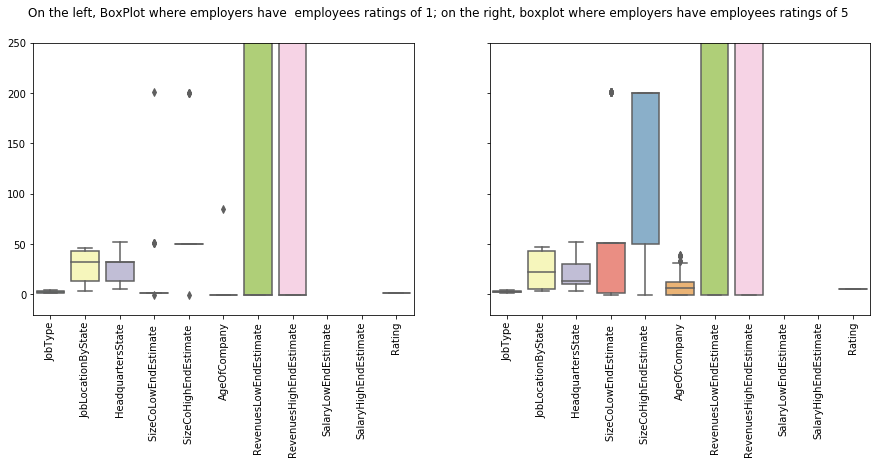

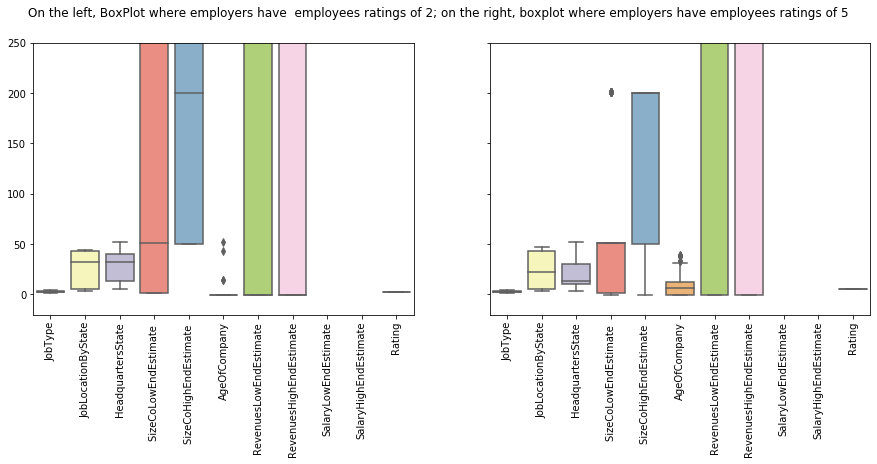

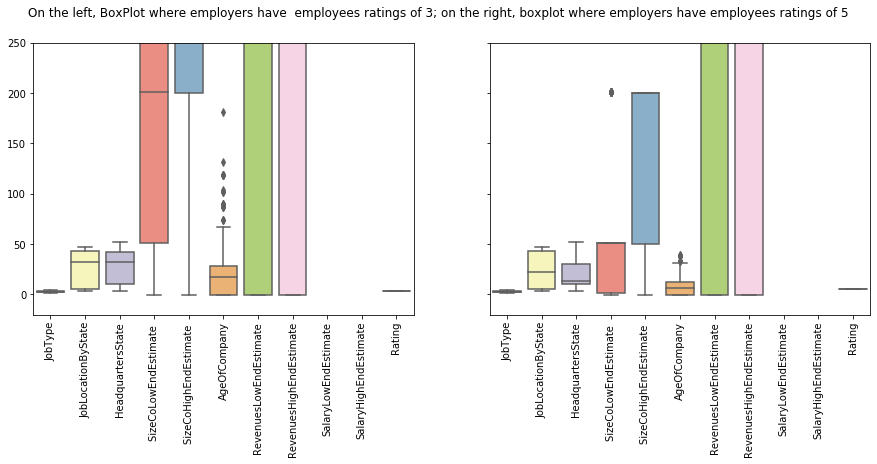

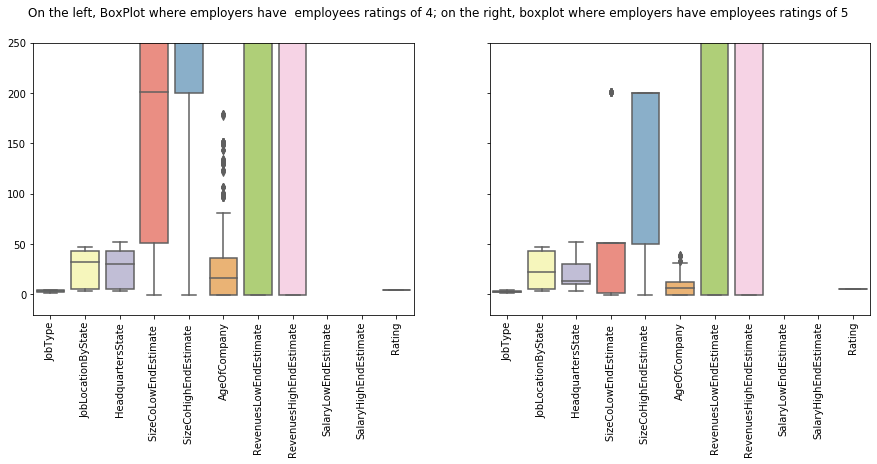

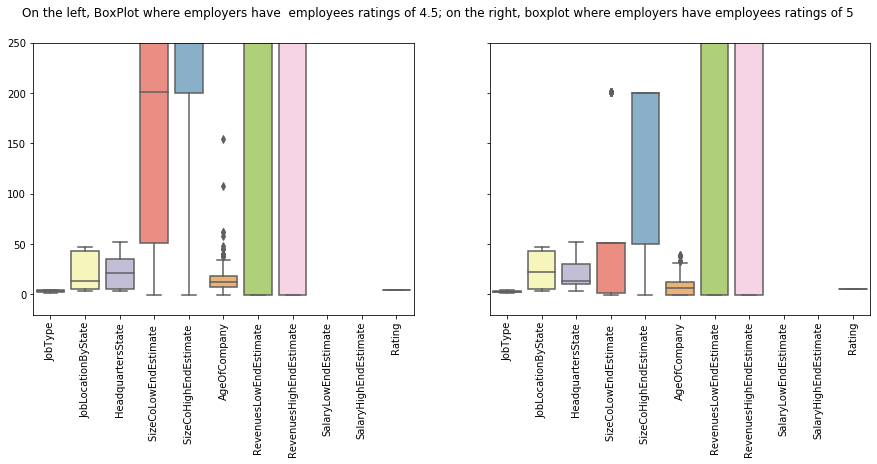

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as md 
from matplotlib.dates import DateFormatter
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
dfBigDataJobs = pd.read_csv("BigDataJobs.csv", header=0)
dfBigDataJobs.set_index("RowID",inplace=True)
#
# 1. Contrast between Glassdoor rating = 1 and Glassdoor rating = 5       
dfBigDataJobsRating = dfBigDataJobs[dfBigDataJobs['Rating']==1]
mpl.rcParams['figure.figsize'] = (15,5)
f, axes = plt.subplots(1, 2, sharey=True)    
f.suptitle("On the left, BoxPlot where employers have  employees ratings of 1; on the right, boxplot where employers have employees ratings of 5")
sns.boxplot(data=dfBigDataJobsRating, orient='v', palette='Set3', ax=axes[0])
dfBigDataJobsRating = dfBigDataJobs[dfBigDataJobs['Rating']==5]
sns.boxplot(data= dfBigDataJobsRating, orient='v', palette='Set3', ax=axes[1])
for ax in f.axes:
    mpl.pyplot.sca(ax)
    plt.ylim(-20,250)
    plt.xticks(rotation=90)
# 2. Contrast between Glassdoor rating = 2 and Glassdoor rating = 5
dfBigDataJobsRating = dfBigDataJobs[dfBigDataJobs['Rating']==2]
mpl.rcParams['figure.figsize'] = (15,5)
f,axes = plt.subplots(1,2,sharey=True )        
f.suptitle("On the left, BoxPlot where employers have  employees ratings of 2; on the right, boxplot where employers have employees ratings of 5")
sns.boxplot(data=dfBigDataJobsRating, orient='v', palette='Set3', ax=axes[0])
dfBigDataJobsRating = dfBigDataJobs[dfBigDataJobs['Rating']==5]
sns.boxplot(data= dfBigDataJobsRating, orient='v', palette='Set3', ax=axes[1])
for ax in f.axes:
    mpl.pyplot.sca(ax)
    plt.ylim(-20,250)
    plt.xticks(rotation=90)
# 3. Contrast between Glassdoor rating = 3 and Glassdoor rating = 5
dfBigDataJobsRating = dfBigDataJobs[dfBigDataJobs['Rating']==3]
mpl.rcParams['figure.figsize'] = (15,5)
f, axes = plt.subplots(1, 2, sharey=True )        
f.suptitle("On the left, BoxPlot where employers have  employees ratings of 3; on the right, boxplot where employers have employees ratings of 5")
sns.boxplot(data=dfBigDataJobsRating, orient='v', palette='Set3', ax=axes[0])
dfBigDataJobsRating = dfBigDataJobs[dfBigDataJobs['Rating']==5]
sns.boxplot(data= dfBigDataJobsRating, orient='v', palette='Set3', ax=axes[1])
for ax in f.axes:
    mpl.pyplot.sca(ax)
    plt.ylim(-20,250)
    plt.xticks(rotation=90)
# 4. Contrast between Glassdoor rating = 4 and Glassdoor rating = 5
dfBigDataJobsRating = dfBigDataJobs[dfBigDataJobs['Rating']==4]
mpl.rcParams['figure.figsize'] = (15,5)
f, axes = plt.subplots(1, 2, sharey=True )        
f.suptitle("On the left, BoxPlot where employers have  employees ratings of 4; on the right, boxplot where employers have employees ratings of 5")
sns.boxplot(data=dfBigDataJobsRating, orient='v', palette='Set3', ax=axes[0])
dfBigDataJobsRating = dfBigDataJobs[dfBigDataJobs['Rating']==5]
sns.boxplot(data= dfBigDataJobsRating, orient='v', palette='Set3', ax=axes[1])
for ax in f.axes:
    mpl.pyplot.sca(ax)
    plt.ylim(-20,250)
    plt.xticks(rotation=90)
# 5. Contrast between Glassdoor rating = 4.5 and Glassdoor rating = 5
dfBigDataJobsRating = dfBigDataJobs[dfBigDataJobs['Rating']==4.5]
mpl.rcParams['figure.figsize'] = (15,5)
f, axes = plt.subplots(1, 2, sharey=True )        
f.suptitle("On the left, BoxPlot where employers have  employees ratings of 4.5; on the right, boxplot where employers have employees ratings of 5")
sns.boxplot(data=dfBigDataJobsRating, orient='v', palette='Set3', ax=axes[0])
dfBigDataJobsRating = dfBigDataJobs[dfBigDataJobs['Rating']==5]
sns.boxplot(data= dfBigDataJobsRating, orient='v', palette='Set3', ax=axes[1])
for ax in f.axes:
    mpl.pyplot.sca(ax)
    plt.ylim(-20,250)
    plt.xticks(rotation=90)

Insight 3 : KEY INSIGHT : There are correlation between companies' number of employees and their Glassdoor ratings; but the only actionable insight they seem to yield is that companies with at least 50 employees are likelier than others to have a Glassdoor rating between 3 up to 4.5.

Additioanally, companies' number of years since founding do seem to change between different Glassdor ratings but oscillate in a seemingly meaningless pattern.

DETAILS : The boxplots above show Glassdoor ratings in the range of 1 to 3 increasing with the minima and medians of workforce size in terms of numbers of employees:

(1) Glassdoor ratings of 2 are associated with at a minimum of at least 50 employees and a median of 200 employees employees on the high end of Glassdoor's estimated range.

(2) However, Glassdoor ratings of 3 and 4 and 4.5 are both each associated with the SAME minimum of at least 50 employees and a median of 200 emplyees EVEN on the LOW end of Glassdoor's estimated range, and are associated with a MINIMUM of 200 employees on the high end of Glassdoor's estimated range.

(3) However, for the highest possible Glassdoor rating of 5, the associated numbers of employes per company DECREASED to 0 to 50 employees on the low end of Glassdoor's estimated range and from 50 to 200 employees on the high end of Glassdoor's estimated range.

In [1]:
def JobSelect():
    Selexn = 0 
    print("We have job openings listed for 4 different categories of jobs :  ")
    print("1. Data Analyst")
    print ("2. Business Analyst")
    print("3. Data Engineer")
    print("4. Data Scientist")
    print(" You can search on only a single job category at a time ")
    print(" ")
    JobChoiceA = input("Enter your job category selection ")
# Remove all white spaces from start and end and within entered job choice and
# also convert it entirely to lowercase
    JobChoiceB = JobChoiceA.lower()
    JobChoiceC = JobChoiceB.strip()
    JobChoice = JobChoiceC.replace(" ","")
    if JobChoice.find("data") == 0 or JobChoice[0] != 2 :
        if JobChoice[0:8] == "datascien" or JobChoice.find("4") == 0: 
            JobName = "Data Scientist"
            Selexn = 1 
        if JobChoice[0:9] == "dataanaly" or JobChoice.find("1") == 0:
            JobName = "Data Analyst"
            Selexn = 1  
        if JobChoice[0:11] == "dataengineer" or JobChoice.find("3") == 0 :
            JobName = "Data Engineer"       
            Selexn = 1
    if JobChoice.find("2")== 0 or JobChoice.find("b") == 0 :
        JobName = "Business Analyst"
        Selexn = 1            
    if Selexn == 0 :
        print(" ")
        print("You have either entered a job selection which ")
        print("was not among the 4 available choices ")
        print("or you misspelled your job selection ")
        JobName = "No valid job selection was made " 
        return JobName     
# JobSelect()
Selected = JobSelect()
print(" ")
print(Selected)

We have job openings listed for 4 different categories of jobs :  
1. Data Analyst
2. Business Analyst
3. Data Engineer
4. Data Scientist
 You can search on only a single job category at a time 
 
Enter your job category selection n
 
You have either entered a job selection which 
was not among the 4 available choices 
or you misspelled your job selection 
 
No valid job selection was made 
